# Analyze song syllable sequence

- Get results from syllable_sequence.py
- Read from song_sequence table

<img src="img/syllable_sequence.png" width=500 height=500/>

In [1]:
from deafening.plot import plot_across_days, plot_bar_comparison, plot_paired_data, plot_per_day_block
from database.load import ProjectLoader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from util import save
from util.stats import two_sample_ttest, paired_ttest, rank_sum_test, signed_rank_test
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load database
nb_bout_crit = 10
db = ProjectLoader().load_db()
df = db.to_dataframe(f"""SELECT song_sequence.*, song.taskSessionDeafening, song.block10days
                FROM song_sequence INNER JOIN song ON song.id = song_sequence.songID WHERE song_sequence.nbBoutsUndir >= {nb_bout_crit}""")
df['block10days'].replace(4, 3, inplace=True)  # include block 4 into block 3

In [3]:
df
len(df)

76

## Transition entropy (all syllable types)

- Higher the value, the syllable sequence becomes more variable
- Stop syllable (*) also used in this calculation <br /><br />

In [4]:
# Parameters
fig_ext = '.png'
save_fig= False  # save figure to disk
save_path = save.make_dir(ProjectLoader().path / 'Analysis', 'SequenceAnalysis', add_date=False)

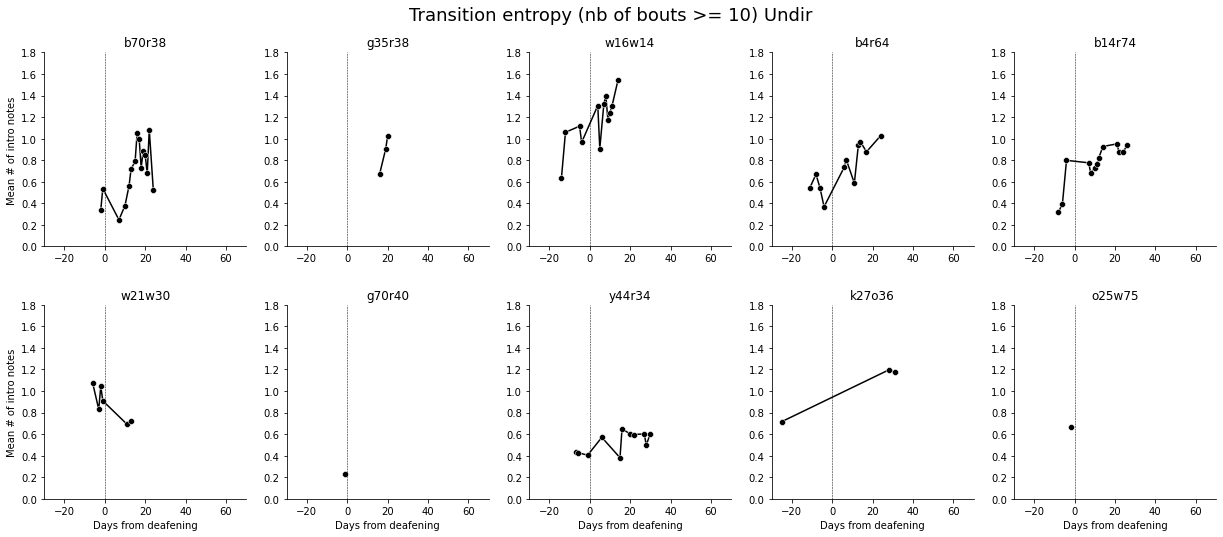

In [5]:
# Transition entropy
plot_across_days(df, x='taskSessionDeafening', y='transEntUndir', 
                 title=f"Transition entropy (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1.8],
                 x_label='Days from deafening', y_label='Mean # of intro notes',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

## Sequence linearity & sequence consistency (Scharff & Nottebohm 1991)




- A value closer to 1 indicates more stereotyped linearity or consistency of the syllable sequence<br />


\begin{equation}
sequence\ linearity = \frac{(number\ of\ unique\ syllables )}{(number\ of\ unique\ transitions\ )}
\end{equation}<br />



\begin{equation}
sequence\ consistency = \frac{(number\ of\ typical\ transitions )}{(total\ number\ of\ possible\ transitions\ )}
\end{equation}<br />


\begin{equation}
song\ stereotypy = \frac{sequence\ linearity + sequency\ consistency}{2}
\end{equation}<br />

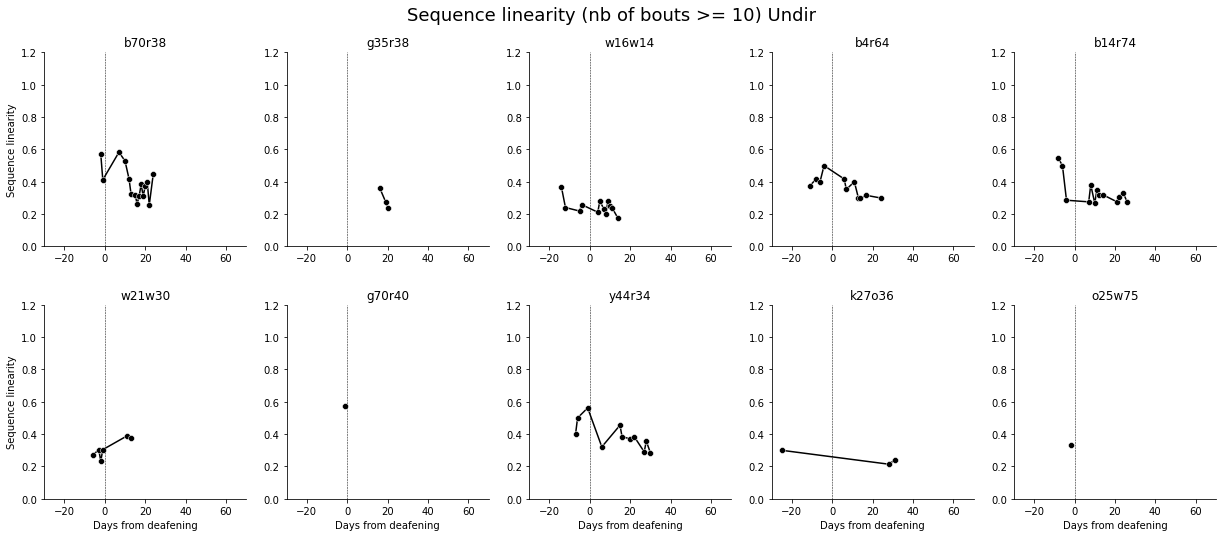

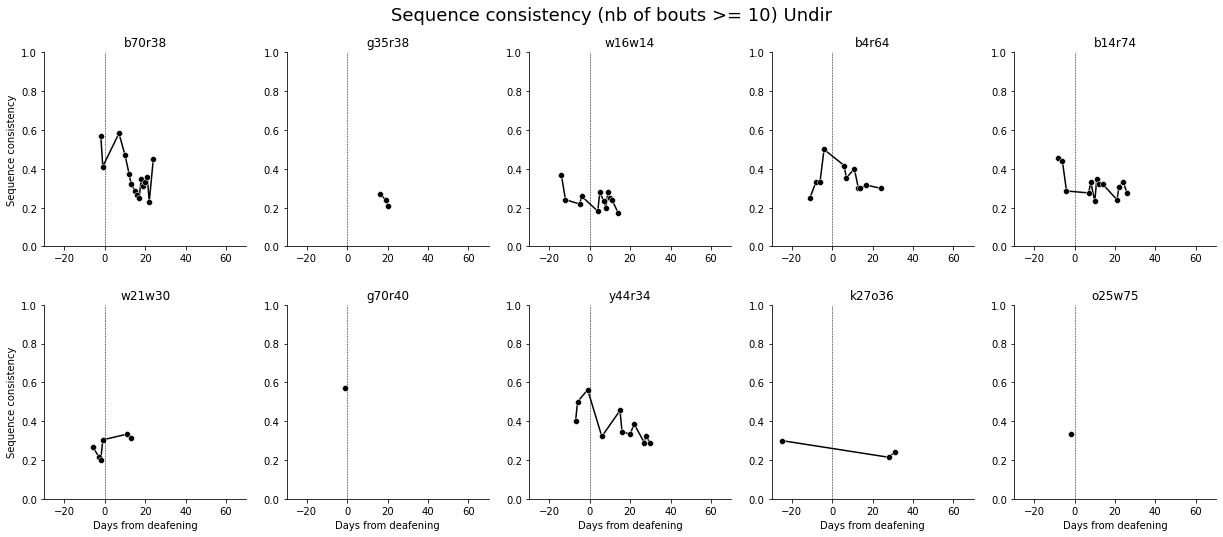

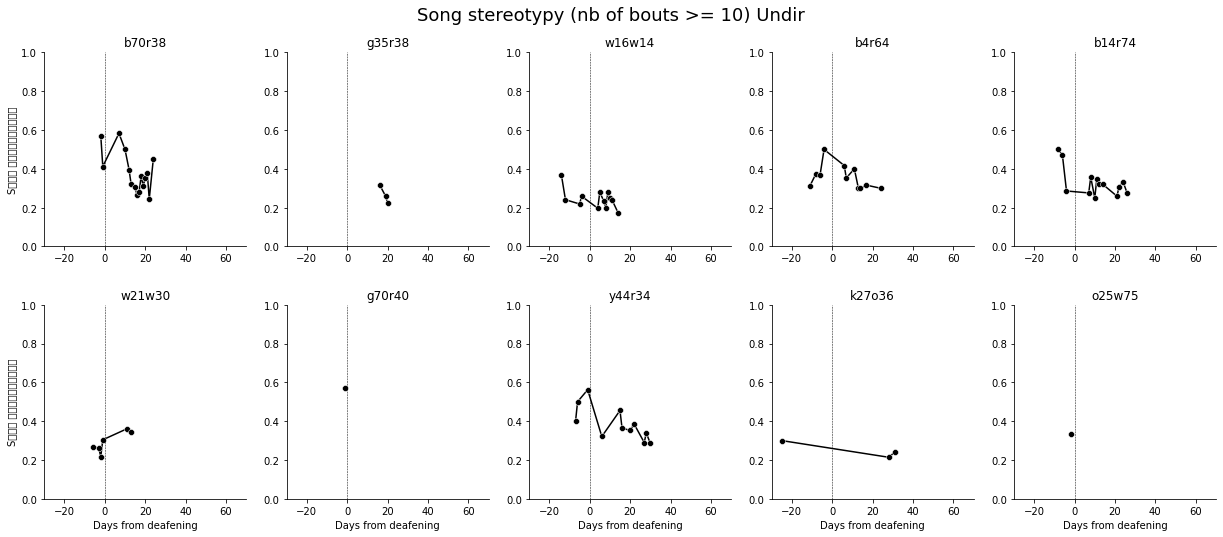

In [6]:
# Sequence linearity
plot_across_days(df, x='taskSessionDeafening', y='seqLinearityUndir', 
                 title=f"Sequence linearity (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1.2],
                 x_label='Days from deafening', y_label='Sequence linearity',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

# Sequence consistency
plot_across_days(df, x='taskSessionDeafening', y='seqConsistencyUndir', 
                 title=f"Sequence consistency (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1],
                 x_label='Days from deafening', y_label='Sequence consistency',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

# S𝑜𝑛𝑔 𝑠𝑡𝑒𝑟𝑒𝑜𝑡𝑦𝑝𝑦
plot_across_days(df, x='taskSessionDeafening', y='songStereotypyUndir', 
                 title=f"Song stereotypy (nb of bouts >= {nb_bout_crit}) Undir",
                 x_lim=[-30, 70],
                 y_lim=[0, 1],
                 x_label='Days from deafening', y_label='S𝑜𝑛𝑔 𝑠𝑡𝑒𝑟𝑒𝑜𝑡𝑦𝑝𝑦',
                 fig_ext=fig_ext,
                 save_path=save_path,
                 save_fig=save_fig)

## Pre vs. Post

### Transition Entropy

taskName  Predeafening  Postdeafening
birdID                               
b14r74        0.504667       0.833700
b4r64         0.531500       0.849857
b70r38        0.438500       0.730692
g35r38             NaN       0.865667
g70r40        0.228000            NaN
k27o36        0.715000       1.185000
o25w75        0.670000            NaN
w16w14        0.942750       1.274125
w21w30        0.963750       0.705500
y44r34        0.422000       0.562750


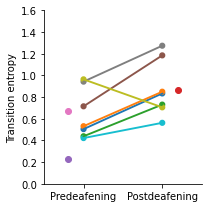

t(15) = -2.325496, p=0.034 (two-sample t-test) *
t(6) = -2.5942, p = 0.041 (paired t-test) *
Z = -2.021, p=0.0433 (rank-sum test) *
Z =  2.000, p=0.0469 (signed-rank test) *


In [7]:
# Transition entropy
from deafening.functions import get_pre_post_mean_per_bird
df_mean = get_pre_post_mean_per_bird(df, 'transEntUndir')
print(df_mean)

plot_paired_data(df, x='taskName', y='transEntUndir',
                 y_label='Transition entropy',
                 y_lim=[0, 1.6],
                 fig_size=(3, 3),
                 fig_name=f"Transition entropy (nb of bouts >= {nb_bout_crit}) Undir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.png'
                 )
# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg, sig = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)" + " " + sig)
_, _, msg, sig = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)" + " " + sig)
_, _, msg, sig = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)" + " " + sig)
_, _, msg, sig = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)" + " " + sig)

### Sequence linearity

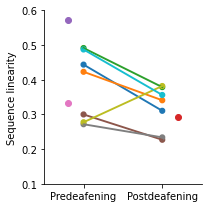

t(15) =  1.949948, p=0.070 (two-sample t-test) ns
t(6) = 2.1260, p = 0.078 (paired t-test) ns
Z =  1.443, p=0.1489 (rank-sum test) ns
Z =  4.000, p=0.1094 (signed-rank test) ns


In [8]:
# Sequence linearity
plot_paired_data(df, x='taskName', y='seqLinearityUndir',
                 y_label='Sequence linearity',
                 y_lim=[0.1, 0.6],
                 fig_size=(3, 3),
                 fig_name=f"Sequence linearity (nb of bouts >= {nb_bout_crit}) Undir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.png'
                 )
df_mean = get_pre_post_mean_per_bird(df, 'seqLinearityUndir')

# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg, sig  = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)" + " " + sig)
_, _, msg, sig  = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)" + " " + sig)
_, _, msg, sig  = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)" + " " + sig)
_, _, msg, sig  = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)" + " " + sig)

### Sequence consistency

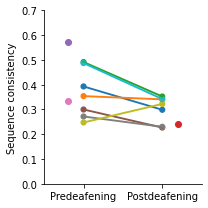

t(15) =  2.053246, p=0.058 (two-sample t-test) ns
t(6) = 2.1163, p = 0.079 (paired t-test) ns
Z =  1.828, p=0.0675 (rank-sum test) ns
Z =  4.000, p=0.1094 (signed-rank test) ns


In [9]:
# Sequence consistency
plot_paired_data(df, x='taskName', y='seqConsistencyUndir',
                 y_label='Sequence consistency',
                 y_lim=[0, 0.7],
                 fig_size=(3, 3),
                 fig_name=f"Sequence consistency (nb of bouts >= {nb_bout_crit}) Undir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.png'
                 )
df_mean = get_pre_post_mean_per_bird(df, 'seqConsistencyUndir')

# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg, sig  = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)" + " " + sig)
_, _, msg, sig  = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)" + " " + sig)
_, _, msg, sig  = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)" + " " + sig)
_, _, msg, sig  = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)" + " " + sig)

### Weighted entropy

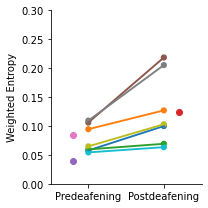

taskName  Predeafening  Postdeafening
birdID                               
b14r74        0.057667       0.099900
b4r64         0.094500       0.127000
b70r38        0.059500       0.069231
g35r38             NaN       0.124000
g70r40        0.039000            NaN
k27o36        0.106000       0.218500
o25w75        0.085000            NaN
w16w14        0.109250       0.205375
w21w30        0.064750       0.103000
y44r34        0.054333       0.063375
t(15) = -2.461316, p=0.026 (two-sample t-test) *
t(6) = -3.1794, p = 0.019 (paired t-test) *
Z = -2.213, p=0.0269 (rank-sum test) *
Z =  0.000, p=0.0156 (signed-rank test) *


In [10]:
plot_paired_data(df, x='taskName', y='WeightedEntropyUndir',
                 y_label='Weighted Entropy',
                 y_lim=[0, 0.3],
                 fig_size=(3, 3),
                 # fig_name=f"Weighted Entropy (nb of bouts >= {nb_bout_crit}) Undir",
                 fig_name=f"WeightedEntropyUndir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.pdf'
                 )
df_mean = get_pre_post_mean_per_bird(df, 'WeightedEntropyUndir')
print(df_mean)
# df_mean.to_csv('weighted_entropy.csv')

# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg, sig  = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)" + " " + sig)
_, _, msg, sig  = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)" + " " + sig)
_, _, msg, sig  = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)" + " " + sig)
_, _, msg, sig  = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)" + " " + sig)

### Canonical transition probability

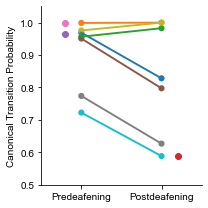

taskName  Predeafening  Postdeafening
birdID                               
b14r74        0.969000       0.828300
b4r64         0.999000       1.000000
b70r38        0.956500       0.982769
g35r38             NaN       0.588000
g70r40        0.965000            NaN
k27o36        0.951000       0.797500
o25w75        1.000000            NaN
w16w14        0.774000       0.626875
w21w30        0.975750       1.000000
y44r34        0.722667       0.588500
t(15) =  1.730939, p=0.104 (two-sample t-test) ns
t(6) = 2.2852, p = 0.062 (paired t-test) ns
Z =  0.770, p=0.4414 (rank-sum test) ns
Z =  6.000, p=0.2188 (signed-rank test) ns


In [12]:
plot_paired_data(df, x='taskName', y='CanonicalTransProbUndir',
                 y_label='Canonical Transition Probability',
                 y_lim=[0.5, 1.05],
                 fig_size=(3, 3),
                 fig_name=f"CanonicalTransProbUndir",
                 save_fig=False,
                 save_path=save_path,
                 color_by_bird=True,  # color-label birds
                 fig_ext='.pdf'
                 )
df_mean = get_pre_post_mean_per_bird(df, 'CanonicalTransProbUndir')
print(df_mean)
# df_mean.to_csv('canonical_transition_prob.csv')

# Run stats
df_dropna = df_mean.dropna()  # remove if any of the columns is nan, used for paired comparisons

_, _, msg, sig  = two_sample_ttest(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (two-sample t-test)" + " " + sig)
_, _, msg, sig  = paired_ttest(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (paired t-test)" + " " + sig)
_, _, msg, sig  = rank_sum_test(df_mean['Predeafening'].values, df_mean['Postdeafening'].values)
print(msg + " (rank-sum test)" + " " + sig)
_, _, msg, sig  = signed_rank_test(df_dropna['Predeafening'].values, df_dropna['Postdeafening'].values)
print(msg + " (signed-rank test)" + " " + sig)

## Plot across day blocks

In [12]:
save_fig = False
fig_ext = '.png'
df_block = df.groupby(['birdID', 'block10days'])[['transEntUndir', 'seqLinearityUndir', 'seqConsistencyUndir', 'songStereotypyUndir']].mean().reset_index()  
df_block.dropna(inplace=True)
df_block

,birdID,block10days,transEntUndir,seqLinearityUndir,seqConsistencyUndir,songStereotypyUndir
0,b14r74,0,0.504667,0.443667,0.393000,0.418333
1,b14r74,1,0.728667,0.308000,0.280667,0.294333
2,b14r74,2,0.836667,0.329333,0.329333,0.329333
3,b14r74,3,0.910250,0.298250,0.289500,0.294000
4,b4r64,0,0.531500,0.423000,0.354000,0.388500
5,b4r64,1,0.770500,0.385000,0.385000,0.385000
6,b4r64,2,0.845250,0.329000,0.329000,0.329000
7,b4r64,3,1.027000,0.300000,0.300000,0.300000
8,b70r38,0,0.438500,0.491500,0.491500,0.491500
9,b70r38,1,0.313500,0.556000,0.527000,0.541500


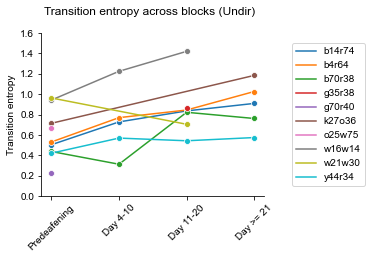

F = 1.812, p = 0.174 (One-way ANOVA)


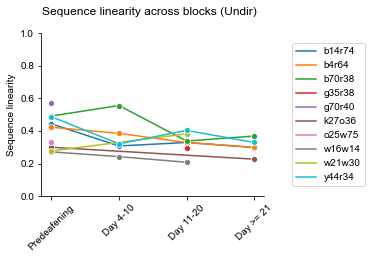

F = 1.455, p = 0.254 (One-way ANOVA)


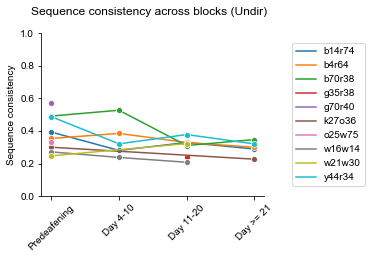

F = 1.498, p = 0.243 (One-way ANOVA)


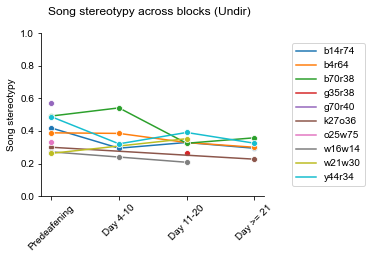

F = 1.489, p = 0.245 (One-way ANOVA)


In [13]:
def plot_across_blocks(df_block, variable, 
                       y_lim=None, fig_size=(4, 3),
                       y_label=None, 
                       fig_name=None, 
                       save_fig=False, save_path=None, 
                       fig_ext='.png'
                       ):
    
    from util.draw import remove_right_top
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    plt.suptitle(fig_name, y=1, fontsize=12)
    sns.lineplot('block10days', variable, hue='birdID', marker='o', data=df_block, ax=ax)
    remove_right_top(ax)
    ax.set_xlabel(''), ax.set_ylabel(y_label)
    ax.set_ylim(y_lim)
    day_block_label_list = ['Predeafening', 'Day 4-10', 'Day 11-20', 'Day >= 21']
    ax.set_xticklabels(day_block_label_list, rotation=45)
    ax.set_xticklabels(day_block_label_list, rotation=45)
    ax.set_xticks([0, 1, 2, 3])
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

    # Run one-way ANOVA
    import scipy.stats as stats
    f_val, p_val = stats.f_oneway(
                                  df_block[variable][df_block['block10days'] == 0],
                                  df_block[variable][df_block['block10days'] == 1],
                                  df_block[variable][df_block['block10days'] == 2],
                                  df_block[variable][df_block['block10days'] == 3],
                                  )

    msg = f"""F ={f_val: 0.3f}, p ={p_val: 0.3f} (One-way ANOVA)"""
    if save_fig:
        save.save_fig(fig, save_path, fig_name, view_folder=view_folder, fig_ext=fig_ext)
    else:
        plt.show()
    print(msg)  

# Transition entropy
plot_across_blocks(df_block, variable='transEntUndir', 
                   fig_name='Transition entropy across blocks (Undir)',
                   y_lim=[0, 1.6], 
                   y_label='Transition entropy', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )

# Sequence linearity
plot_across_blocks(df_block, variable='seqLinearityUndir', 
                   fig_name='Sequence linearity across blocks (Undir)',
                   y_lim=[0, 1], 
                   y_label='Sequence linearity', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )

# Sequence consistency
plot_across_blocks(df_block, variable='seqConsistencyUndir', 
                   fig_name='Sequence consistency across blocks (Undir)',
                   y_lim=[0, 1], 
                   y_label='Sequence consistency', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )

# Song stereotypy
plot_across_blocks(df_block, variable='songStereotypyUndir', 
                   fig_name='Song stereotypy across blocks (Undir)',
                   y_lim=[0, 1], 
                   y_label='Song stereotypy', 
                   save_fig=save_fig, fig_ext=fig_ext
                   )